# Probabilidade e Estatística - Atividade 2

<img src="Arquivos/pe.jpg"  width=80%>

In [76]:
# importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import statistics as std

In [12]:
df = pd.read_csv("Populacao360.csv", sep = ';')
df = df.drop(['Unnamed: 8'], axis = 1)
df.IMC = df.IMC.apply(lambda x: x.replace(',','.'))
df.IMC = df.IMC.astype(float)

In [110]:
# ver os valores iniciais
df.head()

,nº,sexo,idade,peso,altura,IES,IMC,Clas IMC
0,1,F,19,52,167,UFAC,18.6,ad
1,2,F,20,78,177,UFAC,24.9,ad
2,3,F,22,56,172,UFAC,18.9,ad
3,4,F,19,45,165,UFAC,16.5,mg
4,5,F,18,60,160,UFAC,23.4,ad


### 1 - Para as variáveis SEXO e IES, obter o número absoluto e a frequência relativa percentual.

In [14]:
# número absoluto
df.sexo.value_counts()

M    184
F    176
Name: sexo, dtype: int64

Há 184 homens e 176 mulheres

In [16]:
# número absoluto
df.IES.value_counts()

UFSCAR    220
UFAC      140
Name: IES, dtype: int64

Há 220 estudantes da UFSCAR e 140 da UFAC

In [29]:
# frequência relativa em porcentagem
df.sexo.value_counts()/df.shape[0] * 100

M    51.111111
F    48.888889
Name: sexo, dtype: float64

Mulheres representam aproximadamente 51.1% do dataset, enquanto os homens representam 48.8%

In [19]:
# frequência relativa em porcentagem
df.IES.value_counts()/df.shape[0] * 100

UFSCAR    61.111111
UFAC      38.888889
Name: IES, dtype: float64

Estudantes da UFSCAR representam aproximadamente 61.1% do dataset, enquanto estudantes da UFAC 38.8% 

### 2 - Obter os Box-plot para as variáveis quantitativas (IDADE, PESO, ALTURA e IMC) separadamente (um para cada variável já que elas têm diferentes unidades de medidas. Interpretar os box-plot baseando-se na presença ou não de “outliers” (dados discrepantes), nos tamanhos das hastes, na posição relativa da mediana dentro da caixa (box) e outras características que considerar importante.

### IDADE

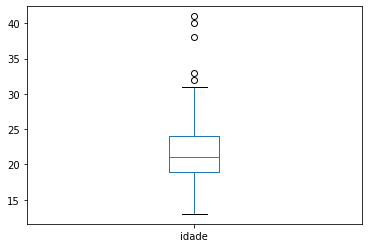

In [30]:
# boxplot para idade
fig, ax = plt.subplots()
df.idade.plot(kind = 'box');
plt.show()

In [38]:
# obter valores descritivos
df.idade.describe()

count    360.000000
mean      21.644444
std        3.884291
min       13.000000
25%       19.000000
50%       21.000000
75%       24.000000
max       41.000000
Name: idade, dtype: float64

In [132]:
# identificar o iqr da variável idade
q1_idade = df.idade.quantile(.25)
q3_idade = df.idade.quantile(.75)
IQR_idade = q3_idade - q1_idade
print('IQR da variável price: ', IQR_idade)

# definir os limites superiores e inferiores                                      
sup_idade = q3_idade + 1.5 * IQR_idade
inf_idade = q1_idade - 1.5 * IQR_idade

print('Limite superior de idade: ', sup_idade)
print('Limite inferior de idade: ', inf_idade)

IQR da variável price:  5.0
Limite superior de idade:  31.5
Limite inferior de idade:  11.5


Com o boxplot para a varíavel idade podemos observar que a mediana está em 21. Ao calcular a média, obtemos 21.6, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 13, enquanto o máximo, identificado pela haste superior é 41. Ao verificar o gráfico, há a presença de outliers. Isto acontece porque se definirmos o IQR para o nosso conjunto de idades, temos como limite superior 31.5 anos, contudo, não podemos descartar essas informações porque são relevantes. Observando o contexto (alunos do ensino superior), também seria necessário verificar idades abaixo de 17 anos para garantir que os valores estão realmente verdadeiros e não irão atrapalhar a análise. O primeiro quartil (25%) está em 19 anos, já o terceiro quartil (75%) está em 24 anos. Isso significa que 75% dos indivíduos coletados tem mais de 19 anos, e 25% dos indivíduos coletados tem mais de 24 anos.

### PESO

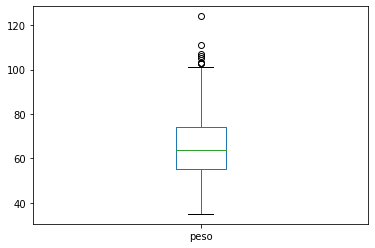

In [39]:
# boxplot para peso
fig, ax = plt.subplots()
df.peso.plot(kind = 'box');
plt.show()

In [117]:
# ver valores descritivos
df.peso.describe()

count    360.000000
mean      66.066667
std       15.047594
min       35.000000
25%       55.000000
50%       64.000000
75%       74.000000
max      124.000000
Name: peso, dtype: float64

In [133]:
# identificar o iqr da variável peso
q1_peso = df.peso.quantile(.25)
q3_peso = df.peso.quantile(.75)
IQR_peso = q3_peso - q1_peso
print('IQR da variável price: ', IQR_peso)

# definir os limites superiores e inferiores                                      
sup_peso = q3_peso + 1.5 * IQR_peso
inf_peso = q1_peso - 1.5 * IQR_peso

print('Limite superior de peso: ', sup_peso)
print('Limite inferior de peso: ', inf_peso)

IQR da variável price:  19.0
Limite superior de peso:  102.5
Limite inferior de peso:  26.5


Com o boxplot para a varíavel peso podemos observar que a mediana está em 64 kg. Ao calcular a média, obtemos 66 kg, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 35, enquanto o máximo, identificado pela haste superior é 124. Ao verificar o gráfico, há a presença de outliers. Isto acontece porque se definirmos o IQR para o nosso conjunto de idades, temos como limite superior 102.5 kg, contudo, não podemos descartar essas informações porque são relevantes. O primeiro quartil (25%) do boxplot é 55 kg, o que nos indica que 75% dos usuários possuem kg maior ou igual a esse valor. O terceiro quartil (75%) nos indica 74kg, o que nos indica que 25% dos usuários possuem mais que esse valor.

A variável peso pode ter características que são relacionados ao genero, portanto irei plotar também dois boxplots, um que se refere ao peso para o sexo feminino e outro para o peso do sexo masculino.

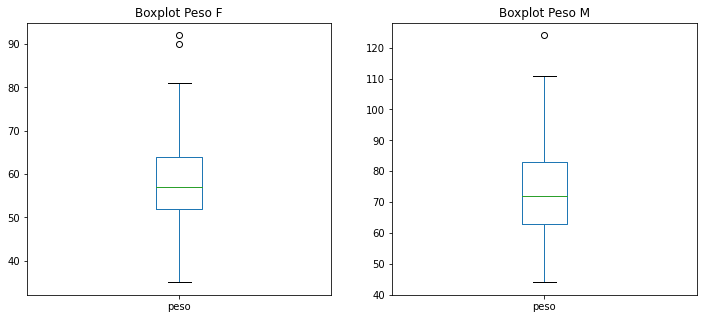

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Boxplot Peso F")
ax2.set_title("Boxplot Peso M")
df.peso.loc[df.sexo == 'F'].plot(kind = 'box', ax = ax1)
df.peso.loc[df.sexo == 'M'].plot(kind = 'box', ax = ax2);
plt.show()

Com os dados separados por sexo, podemos perceber que a mediana do peso para mulheres ficou abaixo de 60, enquanto para os homens acima de 70. Além disso, foram alterados os valores mínimos e máximos, os quartis, e consequentemente a quantidade de outliers.

### ALTURA

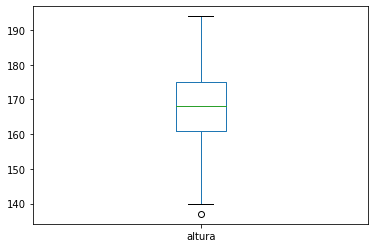

In [40]:
fig, ax = plt.subplots()
df.altura.plot(kind = 'box');
plt.show()

In [119]:
# ver valores descritivos
df.altura.describe()

count    360.00000
mean     168.15000
std        9.57828
min      137.00000
25%      161.00000
50%      168.00000
75%      175.00000
max      194.00000
Name: altura, dtype: float64

Com o boxplot para a varíavel altura, vemos que a mediana é 168 cm. Ao calcular a média, obtemos 168.15 cm, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 137 cm, enquanto o máximo, identificado pela haste superior é 194 cm. Ao verificar o gráfico, não há presença de outliers.

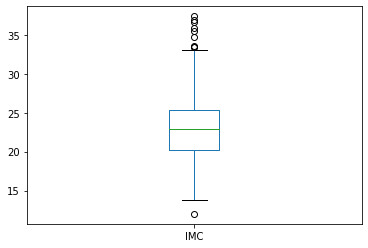

In [67]:
fig, ax = plt.subplots()
df.IMC.plot(kind = 'box');
plt.show()

In [120]:
# ver valores descritivos
df.IMC.describe()

count    360.000000
mean      23.241389
std        4.457035
min       12.000000
25%       20.175000
50%       22.850000
75%       25.400000
max       37.400000
Name: IMC, dtype: float64

In [121]:
# identificar o iqr da variável IMC
q1_IMC = df.IMC.quantile(.25)
q3_IMC = df.IMC.quantile(.75)
IQR_IMC = q3_IMC - q1_IMC
print('IQR da variável price: ', IQR_IMC)

# definir os limites superiores e inferiores                                      
sup_IMC = q3_IMC + 1.5 * IQR_IMC
inf_IMC = q1_IMC - 1.5 * IQR_IMC

print('Limite superior de price: ', sup_IMC)
print('Limite inferior de price: ', inf_IMC)

IQR da variável price:  5.224999999999998
Limite superior de price:  33.2375
Limite inferior de price:  12.337500000000004


Com o boxplot para a varíavel IMC podemos observar que a mediana está em 22.85. Ao calcular a média, obtemos 23.24, o que é um valor aproximado. O valor mínimo identificado pela haste inferior é 12, enquanto o máximo, identificado pela haste superior é 37.4. Ao verificar o gráfico, há a presença de outliers. Isto acontece porque se definirmos o IQR para o nosso conjunto de idades, temos como limite superior 33.23 contudo, não podemos descartar essas informações porque são relevantes.

## (3) Fazer o histograma para os dados quantitativos e comparar os resultados destes histogramas com os box-plots.

De acordo com a regra de Sturges, teríamos
k = 1 + 3.322 * log (360) = 9.5 = 10 classes

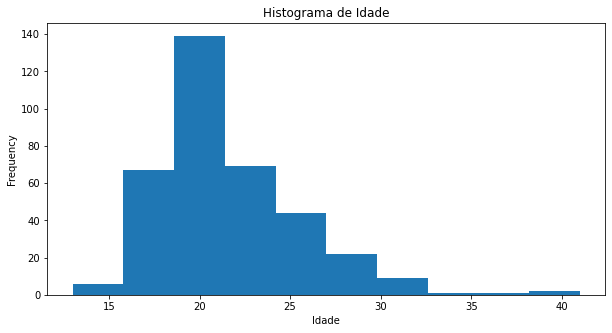

In [149]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Idade")
ax.set_title("Histograma de Idade")
df.idade.plot(kind = 'hist', ax = ax, bins = 10);

O histograma da variável idade está coerente com o seu boxplot. Podemos observar que há uma maior frequência nas idades iniciais. Onde 50% dos usuários tem menos de 21 anos. O que seria considerado como um outlier são os as idades maiores que 31.5, que possuem uma frequência menor.

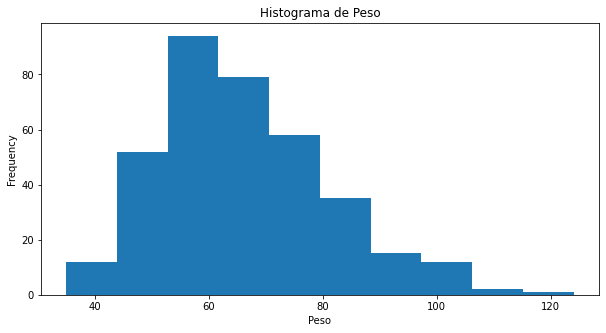

In [151]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Peso")
ax.set_title("Histograma de Peso")
df.peso.plot(kind = 'hist', ax = ax, bins = 10);

### Obter, para os dados populacionais das variáveis IDADE, PESO, ALTURA e IMC as seguintes medidas:
a) Média aritmética.
b) Mediana, primeiro quartil e terceiro quartil.
c) Variância populacional.
d) Desvio Padrão populacional.
e) Coeficiente de Variação.

In [74]:
# média aritmética
print("Idade: ", round(df.idade.mean(),2))
print("Peso: ", round(df.peso.mean(),2))
print("Altura: ", round(df.altura.mean(),2))
print("IMC: ", round(df.IMC.mean(),2))

Idade:  21.64
Peso:  66.07
Altura:  168.15
IMC:  23.24


In [75]:
# mediana
print("Idade: ", round(df.idade.median(),2))
print("Peso: ", round(df.peso.median(),2))
print("Altura: ", round(df.altura.median(),2))
print("IMC: ", round(df.IMC.median(),2))

Idade:  21.0
Peso:  64.0
Altura:  168.0
IMC:  22.85


In [80]:
# variância populacional
print("Idade: ", std.pvariance(df.idade))
print("Peso: ", std.pvariance(df.peso))
print("Altura: ", std.pvariance(df.altura))
print("IMC: ", std.pvariance(df.IMC))

Idade:  15.045802469135802
Peso:  225.8011111111111
Altura:  91.48861111111111
IMC:  19.80998140432099


In [81]:
# desvio padrão populacional
print("Idade: ", std.pstdev(df.idade))
print("Peso: ", std.pstdev(df.peso))
print("Altura: ", std.pstdev(df.altura))
print("IMC: ", std.pstdev(df.IMC))

Idade:  3.8788919125358214
Peso:  15.026679976332467
Altura:  9.564967909570377
IMC:  4.450840527846509


In [82]:
# coeficiente de variação
print("Idade: ", std.pstdev(df.idade)/df.idade.mean() * 100)
print("Peso: ", std.pstdev(df.peso)/df.peso.mean() * 100)
print("Altura: ", std.pstdev(df.altura)/df.altura.mean() * 100)
print("IMC: ", std.pstdev(df.IMC)/df.IMC.mean() * 100)

Idade:  17.92095852814291
Peso:  22.744722466698995
Altura:  5.688354391656484
IMC:  19.150492894916194


### Sexo Feminino

In [90]:
df_fem = df.loc[df.sexo == 'F']

In [91]:
df_fem.shape[0]

176

In [94]:
# média aritmética
print("Idade: ", round(df_fem.idade.mean(),2))
print("Peso: ", round(df_fem.peso.mean(),2))
print("Altura: ", round(df_fem.altura.mean(),2))
print("IMC: ", round(df_fem.IMC.mean(),2))

Idade:  21.21
Peso:  57.91
Altura:  161.68
IMC:  22.17


In [95]:
# mediana
print("Idade: ", round(df_fem.idade.median(),2))
print("Peso: ", round(df_fem.peso.median(),2))
print("Altura: ", round(df_fem.altura.median(),2))
print("IMC: ", round(df_fem.IMC.median(),2))

Idade:  20.0
Peso:  57.0
Altura:  162.0
IMC:  21.85


In [96]:
# desvio padrão populacional
print("Idade: ", std.pstdev(df_fem.idade))
print("Peso: ", std.pstdev(df_fem.peso))
print("Altura: ", std.pstdev(df_fem.altura))
print("IMC: ", std.pstdev(df_fem.IMC))

Idade:  3.5812180435739784
Peso:  10.113481548866156
Altura:  7.119986999709554
IMC:  3.998310593651497


In [97]:
# coeficiente de variação
print("Idade: ", std.pstdev(df_fem.idade)/df_fem.idade.mean() * 100)
print("Peso: ", std.pstdev(df_fem.peso)/df_fem.peso.mean() * 100)
print("Altura: ", std.pstdev(df_fem.altura)/df_fem.altura.mean() * 100)
print("IMC: ", std.pstdev(df_fem.IMC)/df_fem.IMC.mean() * 100)

Idade:  16.884392597616397
Peso:  17.462697464931264
Altura:  4.40370295174614
IMC:  18.036258572961447


### Sexo Masculino

In [92]:
df_man = df.loc[df.sexo == 'M']

In [93]:
df_man.shape[0]

184

In [98]:
# média aritmética
print("Idade: ", round(df_man.idade.mean(),2))
print("Peso: ", round(df_man.peso.mean(),2))
print("Altura: ", round(df_man.altura.mean(),2))
print("IMC: ", round(df_man.IMC.mean(),2))

Idade:  22.06
Peso:  73.86
Altura:  174.34
IMC:  24.27


In [99]:
# mediana
print("Idade: ", round(df_man.idade.median(),2))
print("Peso: ", round(df_man.peso.median(),2))
print("Altura: ", round(df_man.altura.median(),2))
print("IMC: ", round(df_man.IMC.median(),2))

Idade:  21.0
Peso:  72.0
Altura:  175.0
IMC:  23.75


In [100]:
# desvio padrão populacional
print("Idade: ", std.pstdev(df_man.idade))
print("Peso: ", std.pstdev(df_man.peso))
print("Altura: ", std.pstdev(df_man.altura))
print("IMC: ", std.pstdev(df_man.IMC))

Idade:  4.100863105933992
Peso:  14.818393986219048
Altura:  7.22582502272088
IMC:  4.616464400487031


In [101]:
# coeficiente de variação
print("Idade: ", std.pstdev(df_man.idade)/df_man.idade.mean() * 100)
print("Peso: ", std.pstdev(df_man.peso)/df_man.peso.mean() * 100)
print("Altura: ", std.pstdev(df_man.altura)/df_man.altura.mean() * 100)
print("IMC: ", std.pstdev(df_man.IMC)/df_man.IMC.mean() * 100)

Idade:  18.589771162647313
Peso:  20.061691512503163
Altura:  4.144746568304265
IMC:  19.022897670696562


### Calcular, para os dados populacionais das variáveis quantitativas (IDADE, PESO, ALTURA e IMC), as medidas de posição e de dispersão, por IES.

### UFAC

In [102]:
df_ufac = df.loc[df.IES == 'UFAC']

In [103]:
df_ufac.shape[0]

140

In [104]:
# média aritmética
print("Idade: ", round(df_ufac.idade.mean(),2))
print("Peso: ", round(df_ufac.peso.mean(),2))
print("Altura: ", round(df_ufac.altura.mean(),2))
print("IMC: ", round(df_ufac.IMC.mean(),2))

Idade:  21.4
Peso:  66.15
Altura:  168.36
IMC:  23.17


In [105]:
# mediana
print("Idade: ", round(df_ufac.idade.median(),2))
print("Peso: ", round(df_ufac.peso.median(),2))
print("Altura: ", round(df_ufac.altura.median(),2))
print("IMC: ", round(df_ufac.IMC.median(),2))

Idade:  20.0
Peso:  64.0
Altura:  168.0
IMC:  22.9


In [106]:
# desvio padrão populacional
print("Idade: ", std.pstdev(df_ufac.idade))
print("Peso: ", std.pstdev(df_ufac.peso))
print("Altura: ", std.pstdev(df_ufac.altura))
print("IMC: ", std.pstdev(df_ufac.IMC))

Idade:  4.3977266854592045
Peso:  14.161782071073238
Altura:  9.425050749606235
IMC:  3.6237292635502176


In [107]:
# coeficiente de variação
print("Idade: ", std.pstdev(df_ufac.idade)/df_ufac.idade.mean() * 100)
print("Peso: ", std.pstdev(df_ufac.peso)/df_ufac.peso.mean() * 100)
print("Altura: ", std.pstdev(df_ufac.altura)/df_ufac.altura.mean() * 100)
print("IMC: ", std.pstdev(df_ufac.IMC)/df_ufac.IMC.mean() * 100)

Idade:  20.550124698407497
Peso:  21.408589676603533
Altura:  5.598010712082104
IMC:  15.640228655456129


### UFSCAR

In [111]:
df_ufscar = df.loc[df.IES == 'UFSCAR']

In [112]:
df_ufscar.shape[0]

220

In [113]:
# média aritmética
print("Idade: ", round(df_ufscar.idade.mean(),2))
print("Peso: ", round(df_ufscar.peso.mean(),2))
print("Altura: ", round(df_ufscar.altura.mean(),2))
print("IMC: ", round(df_ufscar.IMC.mean(),2))

Idade:  21.8
Peso:  66.01
Altura:  168.01
IMC:  23.29


In [114]:
# mediana
print("Idade: ", round(df_ufscar.idade.median(),2))
print("Peso: ", round(df_ufscar.peso.median(),2))
print("Altura: ", round(df_ufscar.altura.median(),2))
print("IMC: ", round(df_ufscar.IMC.median(),2))

Idade:  21.0
Peso:  63.0
Altura:  168.0
IMC:  22.75


In [115]:
# desvio padrão populacional
print("Idade: ", std.pstdev(df_ufscar.idade))
print("Peso: ", std.pstdev(df_ufscar.peso))
print("Altura: ", std.pstdev(df_ufscar.altura))
print("IMC: ", std.pstdev(df_ufscar.IMC))

Idade:  3.500129867720495
Peso:  15.551813558510714
Altura:  9.650473161011586
IMC:  4.904545370292357


In [116]:
# coeficiente de variação
print("Idade: ", std.pstdev(df_ufscar.idade)/df_ufscar.idade.mean() * 100)
print("Peso: ", std.pstdev(df_ufscar.peso)/df_ufscar.peso.mean() * 100)
print("Altura: ", std.pstdev(df_ufscar.altura)/df_ufscar.altura.mean() * 100)
print("IMC: ", std.pstdev(df_ufscar.IMC)/df_ufscar.IMC.mean() * 100)

Idade:  16.05564159504814
Peso:  23.558486420659346
Altura:  5.743863039857558
IMC:  21.0610552284572
